# Приоритизация гипотез, проведение A/B-теста и анализ его результатов в  крупном интернет-магазине. 

В наше распоряжение предоставлены 9 гипотез для увеличения выручки интернет-магазина, подготовленных вместе с отделом маркетинга. 

**В исследовании мы рассмотрим и приоритизируем эти гипотезы:**
- Применим фреймворк ICE для приоритизации гипотез. Отсортируйем их по убыванию приоритета.
- Применим фреймворк RICE для приоритизации гипотез. Отсортируйем их по убыванию приоритета.
- Выясним, как изменилась приоритизация гипотез при применении RICE вместо ICE и почему так произошло.

**После чего мы запустим A/B-тест и проанализируем его результаты,** для чего осуществим следующие действия:
- Рассчитаем значения и построим графики 
 - кумулятивной выручки по «сырым» и "очищенным" данным.
 - кумулятивного среднего чека и кумулятивного среднего количества заказов на посетителя 
 - определим границу для определения аномальных пользователей и аномальных заказов
 - рассчитаем статистическую значимость различий в среднем количестве заказов на посетителя и в среднем чеке заказа между группами по «сырым» и "очищенным" данным.

**В качестве составной части А/В теста мы сформулируем и проверим гипотезы**:
- о наличии различий в среднем количестве заказов на посетителя между группами по «сырым» данным
- о наличии различий в среднем чеке заказа между группами по «сырым» данным
- о наличии различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
- о наличии различий в среднем чеке заказа между группами по «очищенным» данным

**Ход исследования:**
- Загрузка данных из предоставленного файла со списком гипотез
- Изучение данных
- Приотеризация гипотез
- Загрузка данных из предоставленных файлов с данными проведенных A/B-тестов и подготовка их к анализу
- Изучение общей информации о каждом датафрейме
- Предобработка данных
- Исследовательский анализ данных
- Анализ А/В теста и проверка гипотез
- Выводы и заключения




## Загрузим данные и подготовим их к анализу

Загрузим данные о гипотезах, заказах и пользователях интернет-магазина из CSV-файлов в переменные.

**Пути к файлам**

- гипотезы:  `/ХХХ/hypothesis.csv`. [Скачать датасет](https://ХХХ/hypothesis.csv);
- заказы: `/ХХХ/orders.csv`. [Скачать датасет](https://ХХХ/orders.csv);
- пользователи: `/ХХХ/visitors.csv`. [Скачать датасет](https://ХХХ/visitors.csv).


Изучим данные и выполним предобработку. Есть ли в данных пропуски и дубликаты? Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратим внимание на столбцы с датой и временем.

### Импортируем библиотеки:
- **pandas**  
- **matplotlib** - для построения графиков 
- **IPython.display** для отображения данных 
- **numpy** для отображения размерностей графиков и диаграмм
- **datetime** для работы с данными в формате даты и времени
- **scipy** для расчета статистических тестов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from datetime import datetime, timedelta
import math as mth
from scipy import stats as st

import scipy.stats as stats
import datetime as dt

### Загрузим данные из csv-файлов и сохраним их в переменные:   
- **visits** - информация о посещениях сайта
- **orders** - информация о заказах 
- **costs** - информация о расходах на рекламу.   
В качестве разделителя столбцов используем соответствиующий файлу тип - **\t**

In [85]:
hypothesis = pd.read_csv('/ХХХ/hypothesis.csv')
orders = pd.read_csv('/ХХХ/orders.csv') 
visitors = pd.read_csv('/ХХХ/visitors.csv')

## Выведем основную информацию о датафрейме hypothesis (список гипотез) и ознакомимся с ней
Заказчик сообщил нам структуру файла:

| | | |
|:-----|:----|----:|
Hypothesis |краткое описание гипотезы| |
Reach |охват пользователей по 10-балльной шкале| |
Impact |влияние на пользователей по 10-балльной шкале| |
Confidence |уверенность в гипотезе по 10-балльной шкале| |
Efforts |затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы| |

Выведем на экран датафрейм **hypothesis**, информацию о типах данных и полноте предоставленных данных

In [3]:
hypothesis.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Краткие выводы об основной информации о датафрейме hypothesis: 
В датафрейме представлены 9 гипотез - их описание и метрики Reach, Impact, Confidence, Efforts.   
Данные с описанием представлены в формате object, метрики - в формате целочисленного числа.  
Пропущенные данные отсутствуют.  
Названия столбцов представлены не по правилам "хорошего тона" (присутствуют заглавные буквы) - тем не менее мы воздержимся от их преобразования ввиду краткости датафрейма, специфичности названий столбцов и отсутствия многочисленности операций с ними.
Значения в метриках Reach, Impact, Confidence, Efforts оценены по шкале от 0 до 10 баллов шкалы, за пределами диапазона данные не присутствуют и таким образом значения не препятствует их дальнейшей обработке.  
- Параметр Reach - охват пользователей - принимает максимальное значения для гипотезы 7,
- Параметр Impact - влияние на пользователей - имеет максимальное значения для гипотезы 0,
- Параметр Confidence - уверенность в гипотезе - не бало присвоено максимально возможное значение никакой гипотезе, а лидерство досталось гипотезе 8,
- Параметр Efforts - затраты ресурсов на проверку гипотезы - здесь нам важно минимальное значение - и оно присвоено гипотезе 4    
Окажутся ли перечисленные гипотезы в лидерах после проведения теста по приотеризации - об этом мы скоро узнаем.
<br>

Таким образом предоставленные данные позволяют применить фреймворки ICE и RICE для приоритизации гипотез.  

Напомним, что фреймворк ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач, и включает в себя параметры:
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу.  
<br>

Фреймворк RICE является модефикацией ICE и к вышеуказынным компонентам добавляет параметр:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести.
 
Параметры фреймворков ICE и RICE оценивают в удобных шкалах: например, от 0 до 10 или в числах ряда Фибоначчи. для нашего теста выбрана шкала от 0 до 10 баллов.

##  Приоритизация гипотез. 
### Применим фреймворк ICE. Отсортируйем гипотезы по убыванию приоритета. Округлим значения до одного знака после запятой.
Обозревая значения параметров для оценки ICE несложно заметить, что гипотезы 0, 7 и 8 имеют довольно высокие значения Impact и Confidence, и сравнительно небольшие значения Efforts, что в совокупности будет способствовать увеличению значения рассчитываемого фреймворка.  
Проверим, так ли это.

In [5]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
print(round(hypothesis[['Hypothesis', 'ICE']].sort_values('ICE', ascending = False), 1))

                                          Hypothesis   ICE
8  Запустить акцию, дающую скидку на товар в день...  16.2
0  Добавить два новых канала привлечения трафика,...  13.3
7  Добавить форму подписки на все основные страни...  11.2
6  Показать на главной странице баннеры с актуаль...   8.0
2  Добавить блоки рекомендаций товаров на сайт ин...   7.0
1  Запустить собственную службу доставки, что сок...   2.0
5  Добавить страницу отзывов клиентов о магазине,...   1.3
3  Изменить структура категорий, что увеличит кон...   1.1
4  Изменить цвет фона главной страницы, чтобы уве...   1.0


И действительно расчет вывел указанные выше гипотезы в тройку лидеров с наибольшим баллом у гипотезы 8 - "Запустить акцию, дающую скидку на товар в день рождения". Но какой же у этой гипотезы охват пользователей?   
Проверим второй фреймворк.

### Применим фреймворк RICE. Отсортируйем гипотезы по убыванию приоритета. Округлим значения до одного знака после запятой.
Еще раз взглянув на значения параметров для оценки мы увидим, что параметр  Reach (охват пользователей) имеет значение, равное 10 баллам для гипотезы 7, а для оставшихся двух гипотез-лидеров значение этого параметра невелико и для лидера фрейворка ICE составляет всенр 1 балл. Мы не ошибемся, если предположим, что итоговый балл гипотезы 7 будет наибольшим.   
Проверим же.

In [6]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
print(round(hypothesis[['Hypothesis', 'RICE']].sort_values('RICE', ascending = False), 1))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


И действительно, гипотеза 7 стала абсолютным лидером в приоритезации, оторвавшись от второй позиции по количеству  набранных баллов ровно в два раза. Звучит эта гипотеза так: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Как изменилась приоритизация гипотез при применении RICE вместо ICE и почему так произошло.

Чуть выше мы уже дали оценку причины смены лидера в приоритезации.
И если еще раз более детально посмотрим на параметры гипотез 7 и 8 , то увидим:
- Параметр Impact показывает, что для гипотезы 8 (лидера фреймворка ICE) влияние на охваченных пользователей выше. И это объяснимо - речь идет о конкретной скидке.
- Параметр Confidence показывает, что в оценке других параметров (Reach, Impact, Efforts) для гипотезы 8 мы вновь уверены в большей степени. 
- Параметр Efforts - трудозатраты - одинаков для обеих гипотез.
- А вот параметр Reach для гипотезы 8 затронет затронет примерно в 10 раз меньше пользователей, чем для гипотезы 7 (ведь день рождения , а это гипотеза 8 - только раз в году). Поэтому влияние на пользователей гипотеза 8  окажет минимальное. А гипотеза 8 напротив - окажет максимальное влияние на пользователей, поскольку они получат возможность  подписаться на все основные страницы приложения.

## Выведем основную информацию о датафреймах ```orders```  и ```visitors```  и ознакомимся с ней
### Заказчик сообщил нам структуру файла orders (заказы):

| | | |
|:-----|:----|----:|
transactionId |идентификатор заказа| |
visitorId |идентификатор пользователя, совершившего заказ| |
date |дата, когда был совершён заказ| |
revenue |выручка заказа| |
group |группа A/B-теста, в которую попал заказ| |
  
Выведем первые строки датафрейма visits, информацию о типах данных и о пропусках  

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
print('Количество уникальных пользователей - ', len(orders['visitorId'].unique()))
print('Количество уникальных трансакций - ',len(orders['transactionId'].unique()))
print('Названия уникальных групп - ', orders['group'].unique())
print('Самая ранняя дата начала сессии - ', orders['date'].min())
print('Самая поздняя дата начала сессии- ', orders['date'].max())
print('Количество записей в группе А - ', len(orders.query('group == "A"')))
print('Количество записей в группе В - ', len(orders.query('group == "B"')))

Количество уникальных пользователей -  1031
Количество уникальных трансакций -  1197
Названия уникальных групп -  ['B' 'A']
Самая ранняя дата начала сессии -  2019-08-01
Самая поздняя дата начала сессии-  2019-08-31
Количество записей в группе А -  557
Количество записей в группе В -  640


In [10]:
orders_group_A = orders.query('group == "A"')
orders_group_B = orders.query('group == "B"')
print('Количество уникальных пользователей ВСЕГО  - ', len(orders['visitorId'].unique()))
print('Количество уникальных пользователей в группе A - ', len(orders_group_A['visitorId'].unique()))
print('Количество уникальных пользователей в группе B - ', len(orders_group_B['visitorId'].unique()))

Количество уникальных пользователей ВСЕГО  -  1031
Количество уникальных пользователей в группе A -  503
Количество уникальных пользователей в группе B -  586


In [11]:
print('Количество уникальных пользователей - ', len(orders_group_A['visitorId'].unique()))
print('Количество уникальных пользователей - ', len(orders_group_B['visitorId'].unique()))

Количество уникальных пользователей -  503
Количество уникальных пользователей -  586


In [12]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

### Краткие выводы об основной информации о датафрейме orders 
В датафрейме представлены более 1197 записей о совершении покупок.   
Данные о датах представлены в формате object - потребуется приведение из в формат даты и времени.  
Пропущенные данные отсутствуют.  
Названия столбцов представлены не по правилам "хорошего тона" (присутствуют заглавные буквы в названиях столбцов) -  чуть дальше мы преобразуем их.
Количество уникальных заказов - 1197 и оно совпадает с количеством записей, стало быть, в датафрейме  отсутствуют дублирующиеся заказы.    
Количество уникальных пользовалелей - 1031.  
Уникальных групп - 2, группа А и группа В, отсутствуют иные группы.   
Данные предоставлены за период с 1 по 31 августа 2019 года.   

***Таким образом предоставленных данных достаточно большое количество и они сравнительно равномерно распределены, чтобы провести статистический и сравнительный анализ.***


### Заказчик сообщил нам структуру файла visitors (количество пользователей):

| | | |
|:-----|:----|----:|
date |дата| |
group |группа A/B-теста| |
visitors |количество пользователей в указанную дату в указанной группе A/B-теста| |



In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
print('Количество записей в группе А - ', len(visitors.query('group == "A"')))
print('Количество записей в группе В - ', len(visitors.query('group == "B"')))
print('Названия уникальных групп - ', visitors['group'].unique())
print('Самая ранняя дата начала сессии - ', visitors['date'].min())
print('Самая поздняя дата начала сессии- ', visitors['date'].max())

Количество записей в группе А -  31
Количество записей в группе В -  31
Названия уникальных групп -  ['A' 'B']
Самая ранняя дата начала сессии -  2019-08-01
Самая поздняя дата начала сессии-  2019-08-31


In [16]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

### Краткие выводы об основной информации о датафрейме visitors 
В датафрейме представлены более 62 записи о количестве пользователей в каждую дату проведенного теста. На каждую из групп А и В приходится по 31 записи.   
Данные о датах представлены в формате object - потребуется приведение из в формат даты и времени.  
Пропущенные данные отсутствуют.  
Названия столбцов представлены по правилам "хорошего тона" (отсутствуют заглавные буквы, слова в названиях не разделены пробелами) - их преобразование не потребуется.     
Уникальных групп - 2, группа А и группа В, отсутствуют иные группы.   
Данные предоставлены за период с 1 по 31 августа 2019 года. Период полностью совпадает с периодом в файле orders (покупки).     

***Таким образом предоставленных данных достаточно большое количество и они сравнительно равномерно распределены, чтобы провести статистический и сравнительный анализ.***

### Выполним предобработку данных.

#### Преобразуем данные в столбцах с датой и временем в соответствующий тип данных
На этапе ознакомления с данными мы отметили, что данные в столбцах с датой и временем представлены в строчном формате - для их последующей обработки нам необходимо привести их к формату Datetime

In [17]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
#проверим:
print (orders.info())
print()
print (visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


#### Выявим и при необходимости удалим дубликаты

In [18]:
orders.duplicated().sum()

0

In [19]:
visitors.duplicated().sum()

0

#### Приведем названия столбцов к нижнему регистру
Для единообразия и удобства дальнейшей обработки данных заменим названия столбцов в датафрейме orders путем приведения их к нижнему регистру

In [20]:
orders.columns = orders.columns.str.lower()
orders.head(1)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


#### Проверим, присутствует ли один и тот же клиент как в группе А, так и в группе В.

In [21]:
print('Количество уникальных пользователей ВСЕГО  - ', len(orders['visitorid'].unique()))
print('Количество уникальных пользователей в группе A - ', len(orders['visitorid'].loc[(orders['group'] == "A")].unique()))
print('Количество уникальных пользователей в группе B - ', len(orders['visitorid'].loc[(orders['group'] == "B")].unique()))

Количество уникальных пользователей ВСЕГО  -  1031
Количество уникальных пользователей в группе A -  503
Количество уникальных пользователей в группе B -  586


Важно заметить, что всего в базе orders 1031 уникальных клиентов и при этом в группе А присутствует 503 уникальных клиента, а в группе В - 586 уникальных клиентов (в сумме - 1089, что больше, чем 1031). Таким образом часть клиентов присутствует как в группе А, так и в группе В. Количество таких клиентов - 58, доля таких клиентов - 5,6%.

#### Завершая раздел ознакомления и предобработки данных, выделим следующее:
- Данные о покупках представлены в двух группах - группе А и группе В, данные предоставлены за период с 1 по 31 августа 2019 года.
- Данные о количестве пользователей представлены в двух группах - группе А и группе В, данные предоставлены за период с 1 по 31 августа 2019 года. На каждую из групп А и В приходится по 31 записи.
- Периоды времени в файлах orders и visitort полностью совпадают.
- В процессе предобработки выявлено:
 - пропуски и дубликаты отсутствуют
 - названия столбцов приведены к нижнему регистру
 - данные о датах  и времени преобразованы в формат Datatime 
 - 5,6% клиентов присутствуют как в группе А, так и в группе В. Мы должны помнить, что попавший в одну из групп посетитель должен оставаться в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно. По этой причине мы должны подвергнуть сомнению справедливость разделения клиентов на группы и, соответственно, результаты полученного теста. 
   - тем не менее ввиду того, что доля таких клиентов составляет 5,6%, клиенты не окажут сильного воздействия на результат. При этом, если таких клиентов исключить, то могут быть утеряны данные, которые вносят существенное различие в сравнение групп. Исходя из этого мы примем решение - не удалять клиентов, которые присутствуют в обеих группах.

## Исследовательский анализ данных

Проведем исследовательский анализ данных, в ходе которого выясним:
- Какой диапазон суммы покупок. Какое распределение имеют суммы покупок в разрезе групп
- Сколько клиентов совершили более одной покупки в разрезе групп. Как распределены клиенты по количеству покупок и по сумме покупок в разрез групп
- Как распределены покупки между группами по дням
- Как распределены количество клиентов по группам А и В. Равные ли — это выборки
- Какое время проходит между посещением клиентом сайта и совершением покупки
- Сформулируем выводы

### Какой диапазон суммы покупок. Какое распределение имеют суммы покупок в разрезе групп

In [22]:
# Сооздадим переменную с описательной статистикой для групп  А и В')
describe_for_A = orders.loc[(orders['group'] == "A"), 'revenue'].describe().astype(int).reset_index() 
describe_for_B = orders.loc[(orders['group'] == "B"), 'revenue'].describe().astype(int).reset_index() 

# Объединим переменные в одну таблицу и рассчитаем и выведем разницу данных в поцентах между группами.
display ('Описательная статистика в разрезе групп А и B')
describe_comparison = describe_for_A.merge(describe_for_B, on = 'index', how='left', suffixes = ['A', 'B'] )
describe_comparison['delta'] = ((describe_comparison['revenueB'] / describe_comparison['revenueA'] - 1)*100).round(1)
display(describe_comparison)

'Описательная статистика в разрезе групп А и B'

,index,revenueA,revenueB,delta
0,count,557,640,14.9
1,mean,7333,9230,25.9
2,std,11847,52449,342.7
3,min,50,50,0.0
4,25%,1188,1312,10.4
5,50%,3000,2965,-1.2
6,75%,8280,8355,0.9
7,max,93940,1294500,1278.0


Создадим небольшую функцию для построения распределения по сумме покупок в разрезе групп

In [23]:
def orders_distr(group,  ax):
    
    ax =  orders.query('group == @group').plot(y='revenue'
                                        , kind = 'hist'
                                        , figsize=(10,5)
                                        ,  bins=20
                                        #, title='Распределение по сумме покупок в группе А\n'
                                        , ax=ax
                                        #, range=(0,100000)      
                                        ,grid=True, )
    #plt.legend(fontsize=14, bbox_to_anchor=(1.6, 1))
    plt.title('Распределение по сумме \nпокупок в группе {}\n'.format(group), fontsize=20, color = "b")
    #plt.title('Распределение по сумме \nпокупок в группе A\n', fontsize=20, color = "b")
    plt.xlabel("Сумма покупок", fontsize = 16, color = "b")
    plt.ylabel("Количество покупок", fontsize = 16, color = "b")
    #plt.show()

    return

Совместим две диаграммы на одном графике,   
вызовем функцию и построим графики распределения по сумме покупок в группе тестирования

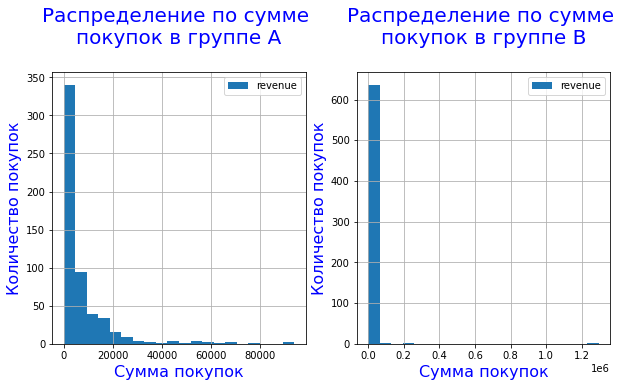

In [24]:
# задаём размер сетки для графиков
plt.figure(figsize=(35, 8))
# в первой ячейке строим распределение по группе А
ax1 = plt.subplot(1, 2, 1)
# вызываем функцию 
orders_distr('A', ax1)
# во второй ячейке строим распределение по группе В
ax2 = plt.subplot(1, 2, 2)
# вызываем функцию
orders_distr('B', ax2)

Построенная гистограмма по группе В не позволяет наблюдать показания и делать выводы ввиду ее нечитабельности. Вероятно, причина в выбросах.   
Ограничим значения по оси абсцисс значением 100 000, соответствующим значению для группы А и построим гистограмму заново

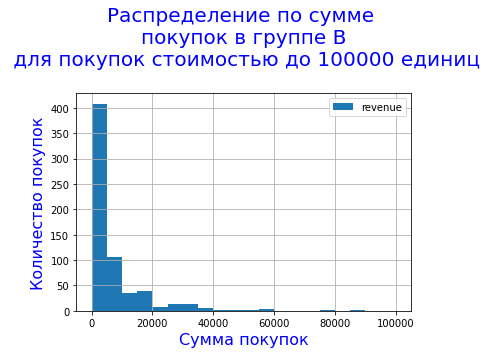

In [25]:
orders.query('group == "B"').plot(y='revenue', kind = 'hist',  bins=20, grid=True, range = (0, 100000)  )
plt.title('Распределение по сумме \nпокупок в группе B\n для покупок стоимостью до 100000 единиц\n', fontsize=20, color = "b")
plt.xlabel("Сумма покупок", fontsize = 16, color = "b")
plt.ylabel("Количество покупок", fontsize = 16, color = "b")
plt.show()

Создадим еще одну функцию для построения "ящика с усами" в разрезе групп

In [26]:
def orders_box(group,  ax):
    
    ax =  orders.query('group == @group').boxplot(['revenue'], figsize=(5,5))
    plt.title('Диапазон нормальных \nзначений в группе A\n', fontsize=20, color = "b")
    plt.ylabel("Сумма покупок", fontsize = 16, color = "b")

    return

Совместим две диаграммы на одном графике,   
Вызовем функцию и построим графики бокс-плот по сумме покупок в группе тестирования

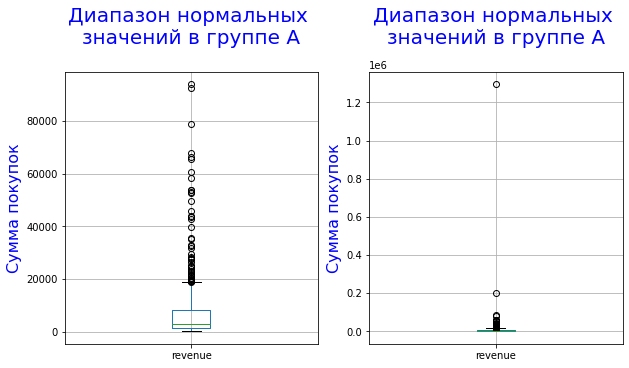

In [27]:
# задаём размер сетки для графиков
plt.figure(figsize=(10, 5))
# в первой ячейке строим распределение по группе А
ax1 = plt.subplot(1, 2, 1)
# вызываем функцию 
orders_box('A', ax1)
# во второй ячейке строим распределение по группе В
ax2 = plt.subplot(1, 2, 2)
# вызываем функцию
orders_box('B', ax2)

**Вывод по разделу:**
-	Количество покупок в группах сопоставимое – в группе A – 557 покупок, в группе В – 640 покупок. Разница параметра между группами составляет 15%
-	Второй и третий квартили в группах имеют почти равные значения, первый квартиль различается на 10%, что позволяет говорить о том, что основная масса покупок в группах была совершена в приблизительно одинаковом диапазоне цен.
-	Среднее значение, разброс и особенно максимальное значение имеют уже значительные различия.
-	Средней размер для большинства покупок находится в пределах 20000 единиц.
-	В группе А и группе В присутствуют многочисленные выбросы в размере до 100000 единиц. При этом в группе В присутствуют два «сверх» выброса в размере 200000  и 1294500 единиц .
-	Наблюдаемая картина не позволяет говорить о нормальном распределении значений покупок и указывает на значительное количество выбросов. Значения между группами имеют заметные различия.


### Сколько клиентов совершили более одной покупки в разрезе групп. Как распределены клиенты по количеству покупок и по сумме покупок в разрез групп

Сформируем переменные t1_A и t1_B, в которых посчитаем количество (а также сумму ) покупок, сделанные каждым покупателем в зависимости от группы

In [28]:
# сформируем переменные t1_A и t1_B, в которых посчитаем количество (а также сумму ) покупок,
# сделанные каждым покупателем в зависимости от группы

t1_A = orders.query('group == "A"').pivot_table(index = 'visitorid', values = 'revenue', aggfunc=('count', 'sum')).reset_index() 
t1_B = orders.query('group == "B"').pivot_table(index = 'visitorid', values = 'revenue', aggfunc=('count', 'sum')).reset_index()
t1_tot = orders.pivot_table(index = 'visitorid', values = 'revenue', aggfunc=('count', 'sum')).reset_index()
display("группа А", t1_A.head(),"группа B", t1_B.head())

'группа А'

,visitorid,count,sum
0,8300375,1,1790
1,11685486,1,6201
2,54447517,1,130
3,66685450,1,7990
4,78758296,1,1044


'группа B'

,visitorid,count,sum
0,5114589,1,570
1,6958315,1,1490
2,8300375,1,10510
3,39475350,1,3990
4,47206413,1,730


Cформируем переменные t2_A и t2_B, в которых отразим количествао покупателей, совершивших суммарно то или иное количество покупок.   
В каждую из таблиц добавим столбец pie, в котором отразим долю покупателей в зависимости от количества сделанных покупок

In [29]:
# сформируем переменные t2_A и t2_B, в которых отразим количествао покупателей, совершивших суммарно то или иное количество покупок
# в каждую из таблиц добавим столбец pie, в котором отразим долю покупателей в зависимости от количества сделанных покупок
t2_A = t1_A.pivot_table(index = 'count', values = 'visitorid', aggfunc=('count'))
t2_A['pie'] = round((t2_A['visitorid'] / len(orders['visitorid'].loc[(orders['group'] == "A")].unique())*100), 1)
#t2_A['tem'] = len(orders['visitorid'].loc[(orders['group'] == "A")].unique())    

t2_B = t1_B.pivot_table(index = 'count', values = 'visitorid', aggfunc=('count'))
t2_B['pie'] = round((t2_B['visitorid'] / len(orders['visitorid'].loc[(orders['group'] == "B")].unique())*100), 1)
#t2_B['tem'] = len(orders['visitorid'].loc[(orders['group'] == "B")].unique()) 

t2_tot = t1_tot.pivot_table(index = 'count', values = 'visitorid', aggfunc=('count'))
t2_tot['pie'] = round((t2_tot['visitorid'] / len(orders['visitorid'].unique())*100), 1)

display("группа А", t2_A, "группа B", t2_B, 'все клиенты', t2_tot)

'группа А'

,visitorid,pie
count,,
1,473,94.0
2,17,3.4
3,7,1.4
4,3,0.6
5,2,0.4
7,1,0.2


'группа B'

,visitorid,pie
count,,
1,552,94.2
2,23,3.9
3,5,0.9
4,4,0.7
5,1,0.2
6,1,0.2


'все клиенты'

,visitorid,pie
count,,
1,937,90.9
2,64,6.2
3,17,1.6
4,3,0.3
5,6,0.6
8,1,0.1
9,1,0.1
11,2,0.2


**Вывод по разделу:**
- почти 91% покупателей совершили всего одну покупку и только 6% - совершили две покупки. Мы не знаем, какой ассортимент у рассматриваемого интернет-магазина. в случае, если это товары повседневного спроса, то можно предположить, что удержание покупателей находится на довольно низком уровне.
- в разрезе групп можно увидеть, что количество клиентов, совершающих две и более покупок, различается всего на 0,2%
- еще раз напомним, что всего в базе orders 1031 уникальных клиентов и при этом в группе А присутствует 503 уникальных клиента, а в группе В - 586 уникальных клиентов (в сумме - 1089, что больше, чем 1031). таким образом один и тот же клиент мог присутствовать как в группе А, так и в группе В.

### Как распределены количество клиентов по группам А и В. Равные ли — это выборки.
Посчитаем разницу в количестве клиентов, просматривающих сайт, относящихся к разным группам. 

In [30]:
# сформируем  переменные visitors_A и  visitors_B, в которые отнесем клиентов соответствующих групп
visitors_A = visitors.query('group == "A"')
visitors_B = visitors.query('group == "B"')
visitors_total = visitors_A.merge(visitors_B, on='date', suffixes = ['A', 'B'])

# посчитаем и внесем в новый столбец относительную разницу между количеством клиентов в каждом дне
visitors_total ['delta'] = round(((visitors_total ['visitorsB'] / visitors_total ['visitorsA'] - 1)*100), 1)

# применим функцию, преобразующее значение в абсолютное, отсотрируем по убыванию значения разницы и выведен на экран
visitors_total ['delta'] = abs(visitors_total ['delta'])
visitors_total.sort_values(by='delta', ascending = False)
#visitors_total

,date,groupA,visitorsA,groupB,visitorsB,delta
22,2019-08-23,A,468,B,546,16.7
15,2019-08-16,A,361,B,413,14.4
14,2019-08-15,A,628,B,544,13.4
17,2019-08-18,A,668,B,737,10.3
27,2019-08-28,A,594,B,654,10.1
6,2019-08-07,A,644,B,709,10.1
24,2019-08-25,A,621,B,679,9.3
9,2019-08-10,A,406,B,369,9.1
11,2019-08-12,A,595,B,543,8.7
28,2019-08-29,A,577,B,531,8.0


**Вывод по разделу:**
Шесть дней из 31 - разница между количеством клиентов, посещающих сайт, имеет значение более 10%. Это существенная разница и она может повлиять на результаты теста.   
**На будущее следует рекомендовать производить разделение клиентов между группами с разницей не более, чем 1%**

### Как распределены покупки между группами по дням
  
Посчитаем разницу в количестве и сумме покупок, совершенных клиентами, относящимися к разным группам, за вессь период исследования

In [31]:
# сформируем  переменные t10_A и  t10_B, в которые отнесем клиентов соответствующих групп и посчитаем количество и сумму покупок
t10_A = orders.query('group == "A"').agg({'revenue': ['count', 'sum']}).reset_index()
t10_B = orders.query('group == "B"').agg({'revenue': ['count', 'sum']}).reset_index()
t10_total = t10_A.merge(t10_B, on='index', suffixes = ['A', 'B'] )
t10_total.columns = ['index', 'group_A', 'group_B']
# добавим столбец delta, в который внесем разницу показателей рассчитанную в процентах 
t10_total['delta'] = round(((t10_total['group_B'] / t10_total['group_A'] - 1)*100),1)
t10_total

,index,group_A,group_B,delta
0,count,557,640,14.9
1,sum,4084803,5907760,44.6


Также посчитаем разницу в количестве и сумме покупок, совершенных клиентами, относящимися к разным группам, но на этот раз в разрезе дней, в которые совершались покупки

In [32]:
# сформируем  переменные orders_A и  orders_B, в которые отнесем клиентов соответствующих групп и сгруппируем их по дате, 
# посчитав количество и сумму покупок, совершенных в конкретные даты
orders_A = orders.query('group == "A"').groupby(by = 'date').agg({'revenue': ['count', 'sum']})
orders_B = orders.query('group == "B"').groupby(by = 'date').agg({'revenue': ['count', 'sum']})

# объединим таблица по дате и выведем на экран 
orders_total = orders_A.merge(orders_B, on='date', suffixes = ['A', 'B'])
orders_total.columns = [ 'count_A', 'sum_A', 'count_B', 'sum_B']
orders_total.head()

,count_A,sum_A,count_B,sum_B
date,,,,
2019-08-01,24,148579,21,101217
2019-08-02,20,93822,24,165531
2019-08-03,24,112473,16,114248
2019-08-04,16,70825,17,108571
2019-08-05,25,124218,23,92428


Построим график, на котором отразим **количество** покупок по группам  в разрезе дней

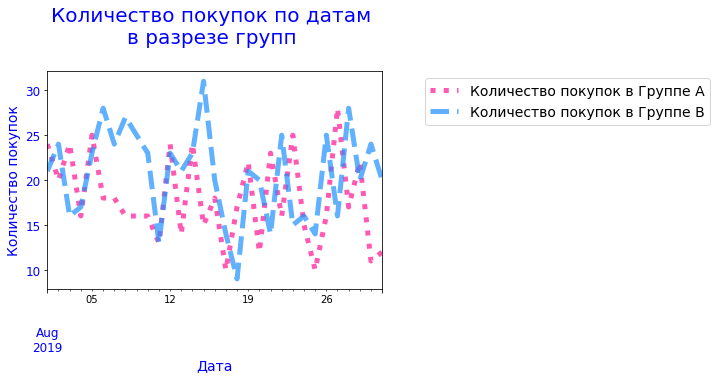

In [33]:
ax = orders_total.plot(style=':',
    #kind='bar',
    y='count_A',
    linewidth=5,
    alpha=0.7, 
    label='Количество покупок в Группе А',
    color = "DeepPink"                   
    )

ax1 = orders_total.plot(style='--',
    #kind='bar',
    y='count_B',
    linewidth=5,
    alpha=0.7, 
    label='Количество покупок в Группе В',
    ax=ax,
    color = "DodgerBlue"                        
    )
plt.title('Количество покупок по датам \nв разрезе групп \n', fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(2, 1))
plt.xticks(rotation=0, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.ylabel("Количество покупок", fontsize=14, color = "b")
plt.xlabel("Дата", fontsize=14, color = "b")


plt.show()

Построим график, на котором отразим **сумму** покупок по группам  в разрезе дней

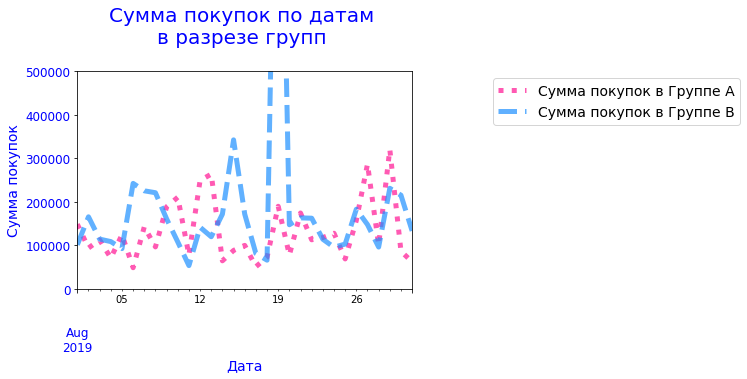

In [34]:
ax = orders_total.plot(style=':',
    #kind='bar',
    y='sum_A',
    linewidth=5,
    alpha=0.7, 
    label='Сумма покупок в Группе А',
    color = "DeepPink"                   
    )

ax1 = orders_total.plot(style='--',
    #kind='bar',
    y='sum_B',
    linewidth=5,
    alpha=0.7, 
    label='Сумма покупок в Группе В',
    ax=ax,         
    color = "DodgerBlue"                        
    )
plt.title('Сумма покупок по датам \nв разрезе групп \n', fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(2, 1))
plt.xticks(rotation=0, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.ylabel("Сумма покупок", fontsize=14, color = "b")
plt.xlabel("Дата", fontsize=14, color = "b")
plt.ylim(0,500000)


plt.show()

**Вывод по разделу:**
-	Количество покупок за период исследования, совершенных клиентами группы В превышаем соответствующий показатель клиентов группы А на 15%
-	Сумма покупок за период исследования, совершенных клиентами группы В превышаем соответствующий показатель клиентов группы А на 44%
-	В первой трети исследования наблюдается сильное превышение количества покупок в группе В по сравнению с группой А
-	Наблюдается резкое падение количества покупок в обоих группах на 18-19 и на 25 день исследования
-	Наблюдается сильное падение количества покупок в группе A в два последних дня исследования
-	Сумма покупок меняется между группами разнонаправленно. Как и для количества покупок, в первой трети исследования наблюдается сильное превышение суммы покупок в группе В по сравнению с группой А
- Аналогично количеству покупок - наблюдается сильное падение суммы покупок в группе A в два последних дня исследования
- На 15 и на 19 день исследования наблюдается пикообразные однодневные всплески продаж. если мы вспомним диаграмму "ящик с усами", то мы отметили два выброса со значениями 200000 и 1294500 единиц


### Какое время проходит между посещением клиентом сайта и совершением покупки.
При проведении теста важно понимание, что время между посещением клиентом сайта и совершением клиентом покупки меньше, чем период сбора данных. Иначе, если время межэду посещением клиентом сайта и совершением покупки будет больше, чем период сбора данных, может произойти ситуация, в которой данные о посещении сайта будут относиться к одним клиентам, а данные о совершении покупок - к другим клиентам.
Для проведения этой части исследования необходимы данные об уникальных номерах пользователей, посещавших сайт и совершивших покупки.  
В предоставленных датафреймах в файле orders номера пользователей указаны, но в файле visitirs такие данные отсутствуют.   
По этой причине отсутствует возможность рассчитать время, проходящее между посещением клиентом сайта и совершением клиентом покупки и соотнести полученные данные с периодом исследования.


### Общий вывод по разделу Исследовательский анализ данных
-	Проведенный анализ не позволяет говорить о нормальном распределении значений покупок и указывает на значительное количество выбросов. 
-	Почти 91% покупателей совершили всего одну покупку и еще 6% - совершили две покупки. Мы не знаем, какой ассортимент у рассматриваемого интернет-магазина. в случае, если это товары повседневного спроса, то можно предположить, что удержание покупателей находится на довольно низком уровне.
-	Всего в исследовании приняли участие 1031 уникальных клиентов и при этом в группе А присутствует 503 уникальных клиента, а в группе В - 586 уникальных клиентов (в сумме - 1089, что больше, чем 1031). Таким образом один и тот же клиент мог присутствовать как в группе А, так и в группе В, что является нежелательным и может повлиять на результаты теста
-	Количеством клиентов разных групп, посещающих сайт, различается более, чем на 10% в течение 6 дней из 31 дня сбора данных. Это существенная разница и она может повлиять на результаты теста. На будущее следует рекомендовать производить разделение клиентов между группами с разницей не более, чем 1%
-	Наблюдается резкое падение количества покупок в обоих группах на 18-19 и на 25 день исследования
-	Отсутствует возможность рассчитать время, проходящее между посещением клиентом сайта и совершением клиентом покупки и соотнести полученные данные с периодом исследования. Это может повлиять на результаты проводимого теста


## Анализ A/B-теста
Проведем анализ A/B-теста, в ходе которого:
- проверим, угрожает ли нашему исследованию проблема подглядывания, для чего определим минимальную длительность теста
- выявним, каков цикл реализации измеряемой метрики
- проверим гипотезу о равенстве долей
- проверим исследуемые значения в датафрейме orders в разрезе групп на нормальность распределения
- выясним наличие статистически значимой разницы между покупками, совершенными в группе А и в группе В
- Проанализируем A/B-тест:
 - Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
 - Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
 - Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
 - Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
 - Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
 - Построим и проанализируем график кумулятивной конверсии
 - Построим график относительного различия кумулятивных конверсий
 - Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
 - Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
 - Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
 - Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
 - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.  Сделаем выводы и предположения.
 - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
 - Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
 - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
 - Примем решение по результатам теста. Варианты решений:
 1. Остановить тест, зафиксировать победу одной из групп.
 2. Остановить тест, зафиксировать отсутствие различий между группами.
 3. Продолжить тест.



### Нужно отметить, что при проведении А/В теста необходимо исключить влияние проблемы подглядывания, 
когда в начале теста поступление новых данных значительно искажает общий результат. Для исключения такого влияния  размер выборок должен быть определен до начала теста. 
Определим минимальную длительность теста, для чего используем калькулятор:
https://vwo.com/tools/ab-test-duration-calculator/ 

Для определения относительного различия между группами теста в 20% нам необходимо задать следующие условия: 
- базовая конверсия в группе А - вычислим ниже 3%, 
- групп (вариаций) - 1, 
- пользователей в день в группе А в среднем - вычислим ниже 600, 
- из них каждый в тесте участвует 

Определим размер базовой конверсии в группе А - вычислим текущий козффициент конверсии в группе А

In [35]:
# Количество посетителей сайта в группе А за период теста
v_A = visitors.query('group == "A"').agg({'visitors':'sum'})
# Количество посетителей, оформивших заказ в группе А за период теста
o_A = orders.query('group == "A"').agg({'visitorid':'count'})
# Конверсия
o_v_A = o_A[0] / v_A[0]
print ('Текущий козффициент конверсии', round(o_v_A,4))

Текущий козффициент конверсии 0.0297


Вычислим количество пользователей в день в группе А в среднем

In [36]:
# Среднее Количество посетителей сайта в день в группе А за период теста
av1 = visitors.loc[(orders['group'] == "A")].agg({'visitors':'mean'})
print ('Среднее Количество посетителей сайта', av1[0].astype(int))

Среднее Количество посетителей сайта 606


Таким образом, подводя маленький итог: для определения относительного различия между группами теста в 20% нам необходимо задать следующие условия: 
- базовая конверсия в группе А - 3%, 
- групп (вариаций) - 1, 
- пользователей в день в группе А в среднем - 600, 
- из них каждый в тесте участвует 

**Вывод по разделу**  
Результат, рассчитанный с применением калькулятора https://vwo.com/tools/ab-test-duration-calculator/  показывает, что минимальная необходимая длительность теста - 22 дня. В нашем случае тест длится 31 день, таким образом, выбрана достаточная длительность теста.

### Каков цикл реализации измеряемой метрики
При проведении теста следует понимать, каков цикл реализации измеряемой метрики. Чаще всего он связан с циклом принятия решения о покупке — временем, прошедшим от первой мысли о приобретении товара до его покупки. Важно понимать, что все пользователи, попавшие в A/B-тест, успели совершить покупку до его завершения и попали в результаты теста.  
  
**Вывод по разделу**  
В разделе Исследовательский анализ данных мы указали, что отсутствует возможность рассчитать время, проходящее между посещением клиентом сайта и совершением клиентом покупки и соотнести полученные данные с периодом исследования.

### Проверка гипотезы о равенстве долей

В группе A вычислим количество посетителей сайта и количество посетителей, овормивших заказ

In [37]:
# Количество посетителей сайта в группе А за период теста
v_A = visitors.query('group == "A"').agg({'visitors':'sum'})
print ('Количество посетителей сайта в группе А', round(v_A[0],4))
# Количество посетителей, оформивших заказ в группе А за период теста
o_A = orders.query('group == "A"').agg({'visitorid':'count'})
print ('Количество посетителей, оформивших заказ в группе А', round(o_A[0],4))

Количество посетителей сайта в группе А 18736
Количество посетителей, оформивших заказ в группе А 557


В группе B вычислим количество посетителей сайта и количество посетителей, овормивших заказ

In [38]:
# Количество посетителей сайта в группе B за период теста
v_B = visitors.query('group == "B"').agg({'visitors':'sum'})
print ('Количество посетителей сайта в группе B', round(v_B[0],4))
# Количество посетителей, оформивших заказ в группе B за период теста
o_B = orders.query('group == "B"').agg({'visitorid':'count'})
print ('Количество посетителей, оформивших заказ в группе B', round(o_B[0],4))

Количество посетителей сайта в группе B 18916
Количество посетителей, оформивших заказ в группе B 640


Сравним доли клиентов, сделавших заказ. 

In [39]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([o_A[0], o_B[0]])
trials = np.array([v_A[0], v_B[0]])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

Посчитаем статистику в стандартных отклонениях стандартного нормального распределения: 

In [40]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

Если бы пропорции были равны, разница между ними была бы равна нулю. Посчитаем, как далеко статистика уехала от нуля. Какова вероятность получить такое отличие или больше? Так как распределение статистики нормальное, вызовем метод cdf(). Саму статистику возьмём по модулю методом abs() — чтобы получить правильный результат независимо от её знака. Это возможно, потому что тест двусторонний. По этой же причине удваиваем результат:

In [41]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод по разделу**  
Такая разница в пропорциях при указанных размерах выборок достаточна, чтобы говорить о статистически значимом различии. 

### Проверка исследуемых значений в датафрейме orders в разрезе групп на нормальность распределения
На практике многие переменные далеки от нормального распределения: в них есть выбросы, игнорировать которые нельзя.  
В зависимости от того - нормальное распределение данных или нет - будет выбран вид статистического теста.   
Для проверки распределения на нормальность применим критерий Шапиро-Уилка.   
Расчёт критерия Шапиро-Уилка встроен в стандартную библиотеку scipy.statsfrom scipy import stats as st.   
Для удобства использования заключим расчёт критерия Шапиро-Уилка в функцию test_shapiro

In [42]:
def test_shapiro(sample):
    #sample_1 = orders_group_B['revenue']

    alpha = 0.05  # критический уровень статистической значимости

    results = st.shapiro(sample)
    p_value = results[
    1
    ]  # второе значение в массиве результатов (с индексом 1) - p-value

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')
    return    

Применим расчёт критерия Шапиро-Уилка для покупок, совершенных пользователями группы А

In [43]:
test_shapiro(orders_group_A['revenue'])

p-значение:  1.739723833199812e-34
Отвергаем нулевую гипотезу: распределение не нормально


Применим расчёт критерия Шапиро-Уилка для покупок, совершенных пользователями группы В

In [44]:
test_shapiro(orders_group_B['revenue'])

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


**Вывод по разделу**  
Итоги расчёта критерия Шапиро-Уилка для клиентов обеих групп, совершивших покупки, не позволяет говорить о нормальности распределения сумм покупок.   
В данных присутствуют выбросы

### Выяснение наличия статистически значимой разницы между покупками, совершенными в группе А и в группе В
В предыдущем пункте мы выявили, что в данных есть большие (по сравнению с нормальным распределением) выбросы. В этом случае  алгебраические метрики работают плохо и мы не можем воспользоваться Гипотезой о равенстве средних двух генеральных совокупностей (или равенстве средних двух (парных) выборок. 
Далее мы применим для A/B-тестирования метод, который называется Непараметрический тест Уилкоксона-Манна-Уитни.   
Расчёт тест Уилкоксона-Манна-Уитни встроен в стандартную библиотеку scipy.statsfrom scipy import stats as st (st.mannwhitneyu()).   
Ключевая идея — проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки. Ранг — это место в упорядоченной выборке. Разница между рангами одних и тех же значений может быть одинакова, и такой сдвиг называют типичным. Значит, просто добавились значения, сдвинувшие все остальные. 
А нетипичные сдвиги по рангу рассматриваются как изменения. Сумма рангов таких сдвигов и выступает значением критерия. Чем он выше — тем больше вероятность, что для этих выборок интересующая нас величина различается.

Применим тест для сравнения покупок, совершенных пользователями группы А и группы В

In [45]:
messages_old = orders_group_A['revenue']
messages_new = orders_group_B['revenue']

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(messages_old, messages_new)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**Вывод по разделу**
Итоги тест Уилкоксона-Манна-Уитни для клиентов групп, совершивших покупки, не позволяет говорить о наличии статистически значимой разницы сумм покупок, совершенных пользователями различных групп.


### Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): 

In [46]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий.    
Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups:   
orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].   
Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:   
.agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}). Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group'/   
Этот код работает так, будто мы ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблицы ordersAggregated. 

In [47]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}),
    axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [48]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну с понятными названиями столбцов: 

In [49]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
#ordersAggregated = datesGroups.apply(
#    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
#    .agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'}),
#    axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
#visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Удостоверимся, корректно ли был содан датафрейм cummulativeData и проверим совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных, проверим и количество записей в каждой группе.

In [50]:
print('Названия уникальных групп - ', cumulativeData['group'].unique())
print('Самая ранняя дата начала сессии - ', cumulativeData['date'].min())
print('Самая поздняя дата начала сессии- ', cumulativeData['date'].max())
print('Количество записей в группе А - ', len(cumulativeData.query('group == "A"')))
print('Количество записей в группе В - ', len(cumulativeData.query('group == "B"')))

Названия уникальных групп -  ['A' 'B']
Самая ранняя дата начала сессии -  2019-08-01 00:00:00
Самая поздняя дата начала сессии-  2019-08-31 00:00:00
Количество записей в группе А -  31
Количество записей в группе В -  31


Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

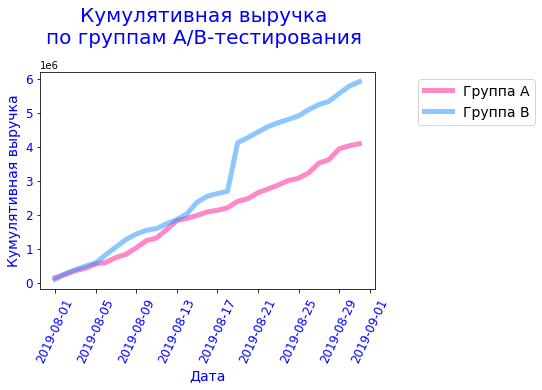

In [51]:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A',
         linewidth=5, alpha=0.5, color = "DeepPink" )

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B',
        linewidth=5, alpha=0.5, color = "DodgerBlue")


plt.title('Кумулятивная выручка \nпо группам A/B-тестирования \n', fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=65, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Дата", fontsize=14, color = "b")
plt.ylabel("Кумулятивная выручка", fontsize=14, color = "b")
plt.show()

**Вывод по разделу**  
Выручка почти равномерно увеличивается в течение всего теста.   
Однако графики выручка  группы В в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем далее.   



### Построим график кумулятивного среднего чека по группам. 
Построим графики кумулятивного среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

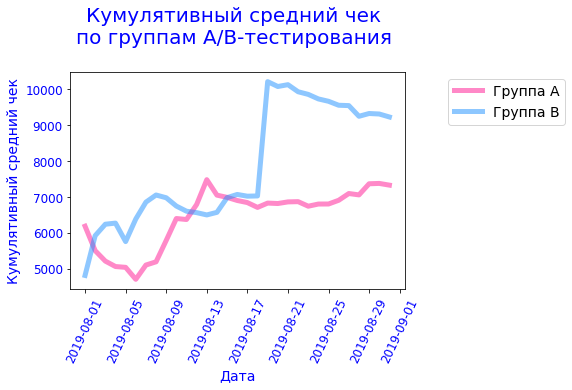

In [52]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Группа A',
        linewidth=5, alpha=0.5, color = "DeepPink" )
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Группа B',
        linewidth=5, alpha=0.5, color = "DodgerBlue")
plt.title('Кумулятивный средний чек \nпо группам A/B-тестирования \n', fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=65, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Дата", fontsize=14, color = "b")
plt.ylabel("Кумулятивный средний чек", fontsize=14, color = "b")
plt.show()


**Вывод по разделу**  
Средний чек тоже имеет резкий рост в дату, соответствующую росту на графике выручки, после чего понижается, что приносит нам уверенность в наличие единичной очень крупной покупки.     

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 
Добавим горизонтальную ось методом axhline() 

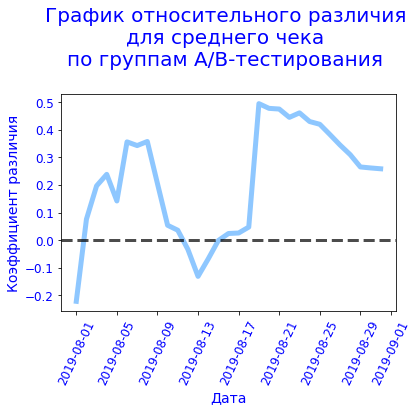

In [53]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB
                                                   , left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date']
         , (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,
         linewidth=5, alpha=0.5, color = "DodgerBlue")

# добавляем ось X
plt.axhline(y=0, color='k', linestyle='--', linewidth=3, alpha=0.7)


plt.title('График относительного различия \nдля среднего чека \nпо группам A/B-тестирования \n', fontsize=20, color = "b")
#plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=65, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Дата", fontsize=14, color = "b")
plt.ylabel("Коэффициент различия", fontsize=14, color = "b")
plt.show()

**Вывод по разделу**  
В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.   

Аналогично проанализируем график кумулятивной конверсии. 

### Построим график кумулятивного среднего количества заказов на посетителя по группам. 
Рассмотрим:
- Кумулятивное количество заказов в разрезе групп
- Кумулятивное среднее количество заказов на посетителя в разрезе групп


Используем созданные ранее датафреймы cumulativeRevenueA и cumulativeRevenueB построим графики количества заказов по группам

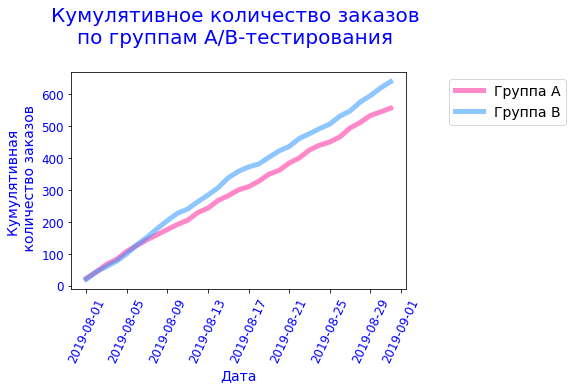

In [54]:
# Построим график количества заказов группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'], label='Группа A',
         linewidth=5, alpha=0.5, color = "DeepPink" )

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'], label='Группа B',
        linewidth=5, alpha=0.5, color = "DodgerBlue")


plt.title('Кумулятивное количество заказов \nпо группам A/B-тестирования \n', fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=65, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Дата", fontsize=14, color = "b")
plt.ylabel("Кумулятивная \n количество заказов", fontsize=14, color = "b")
plt.show()

Построим графики кумулятивного среднего количества заказов на посетителя по группам.   
Положим, что речь идет все-же не о посетителях сайта, а о покупателях - и нам интересен средний чек среди покупателей - это логично.   
Разделим кумулятивное количество заказов на кумулятивное число покупателей.   
Создадим датафрейм cumulativeBuyersA с кумулятивным количеством покупателей и кумулятивным количеством заказов  по дням в группе А и аналогичный датафрейм cumulativeBuyersB в группе В

In [55]:
# датафрейм с кумулятивным количеством покупателей и кумулятивным количеством заказов  по дням в группе А
cumulativeBuyersA = cumulativeData[cumulativeData['group']=='A'][['date','buyers', 'orders']]

# датафрейм с кумулятивным количеством покупателей и кумулятивным количеством заказов  по дням в группе B
cumulativeBuyersB = cumulativeData[cumulativeData['group']=='B'][['date','buyers', 'orders']]

In [56]:
cumulativeBuyersA.head()

,date,buyers,orders
0,2019-08-01,20,24
2,2019-08-02,38,44
4,2019-08-03,62,68
6,2019-08-04,77,84
8,2019-08-05,100,109


Разделим кумулятивное количество заказов на кумулятивное число покупателей. 

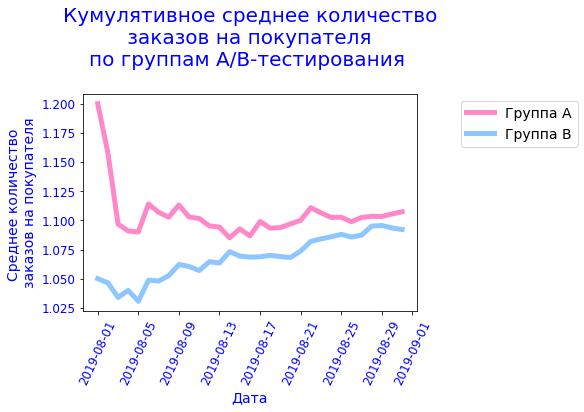

In [57]:
plt.plot(cumulativeBuyersA['date'], cumulativeBuyersA['orders']/cumulativeBuyersA['buyers'], label='Группа A',
        linewidth=5, alpha=0.5, color = "DeepPink" )
plt.plot(cumulativeBuyersB['date'], cumulativeBuyersB['orders']/cumulativeBuyersB['buyers'], label='Группа B',
        linewidth=5, alpha=0.5, color = "DodgerBlue")
plt.title('Кумулятивное среднее количество\n заказов на покупателя \nпо группам A/B-тестирования \n', fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=65, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Дата", fontsize=14, color = "b")
plt.ylabel("Среднее количество \nзаказов на покупателя", fontsize=14, color = "b")
plt.show()


**Вывод по разделу**  
Кумулятивное количество заказов по группе В растет опережающими темпами и к концу периода тестирования превышает аналогичный показетель по группе А примерно на 10% - это довольно большое преимущество.   
Кумулятивное среднее количество заказов на покупателя
- по группе В постоянно и плавно повышается за исключением спада до 5 дня исследования и небольшого спада в три последних дня. 
- по группе А наблюдается аналогичный спад также до 5 дня теста и добее длительный спад с 9 по 14 день теста, а также спад с20 по 25 день теста.  

Можно сказать, что действия покупателей в группе В более предсказуемы и последовательны, хотя среднее количество заказов на покупателя в группе А больше во всем периоде тестирования.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

In [58]:
# собираем данные в одном датафрейме
mergedCumulativeBuyers = cumulativeBuyersA.merge(cumulativeBuyersB
                                                   , left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeBuyers.head()

,date,buyersA,ordersA,buyersB,ordersB
0,2019-08-01,20,24,20,21
1,2019-08-02,38,44,43,45
2,2019-08-03,62,68,59,61
3,2019-08-04,77,84,75,78
4,2019-08-05,100,109,98,101


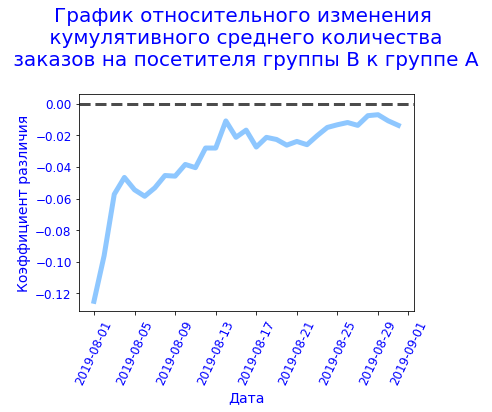

In [59]:
# собираем данные в одном датафрейме
mergedCumulativeBuyers = cumulativeBuyersA.merge(cumulativeBuyersB
                                                   , left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeBuyers['date']
         , (mergedCumulativeBuyers['ordersB']/mergedCumulativeBuyers['buyersB'])
         /(mergedCumulativeBuyers['ordersA']/mergedCumulativeBuyers['buyersA'])-1,
         linewidth=5, alpha=0.5, color = "DodgerBlue")

# добавляем ось X
plt.axhline(y=0, color='k', linestyle='--', linewidth=3, alpha=0.7)


plt.title('График относительного изменения \n кумулятивного среднего количества \n заказов на посетителя группы B к группе A \n'
          , fontsize=20, color = "b")
#plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=65, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Дата", fontsize=14, color = "b")
plt.ylabel("Коэффициент различия", fontsize=14, color = "b")
plt.show()

**Вывод по разделу**  
Мы видим еще одно наглядное подтверждение, что среднее количество заказов на покупателя в группе А больше во всем периоде тестирования, чем среднее количество заказов на покупателя в группе В.

### Также проанализируем график кумулятивной конверсии. 

In [60]:
#pd.to_datetime(cumulativeData['date'], format='%Y-%m-%d')

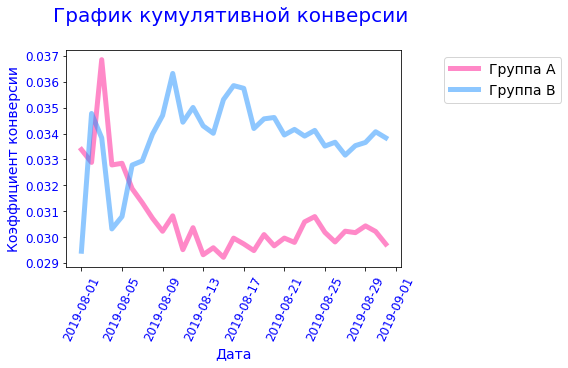

In [61]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
#plt.figure(figsize=(20, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A', linewidth=5, alpha=0.5, color = "DeepPink" )
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B', linewidth=5, alpha=0.5, color = "DodgerBlue" )

# задаем масштаб осей
#plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.04])

plt.title('График кумулятивной конверсии \n'
          , fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=65, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Дата", fontsize=14, color = "b")
plt.ylabel("Коэффициент конверсии", fontsize=14, color = "b")
plt.show()

Видим, что конверсия в группе В начиная с шестого дня теста превышает конверсию в группе А и различие составляет примерно 10%  

### Построим график относительного различия кумулятивных конверсий:

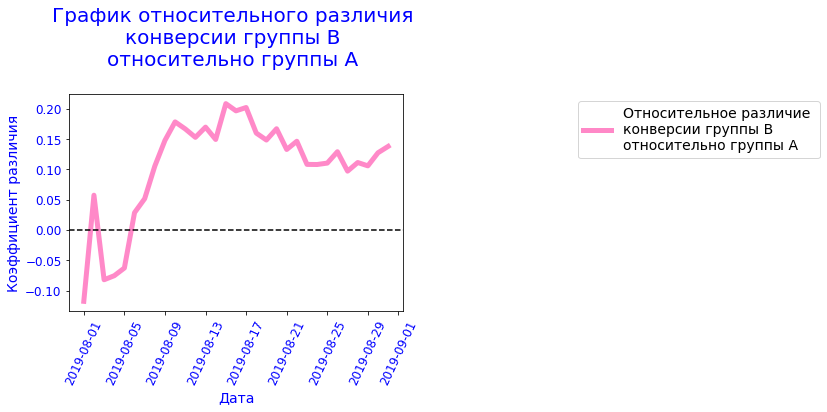

In [62]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']]
                                                                           , left_on='date', right_on='date', how='left'
                                                                           , suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date']
         , mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
         , label="Относительное различие \nконверсии группы B \nотносительно группы A"
         , linewidth=5, alpha=0.5, color = "DeepPink")

plt.axhline(y=0, color='black', linestyle='--')
#plt.axhline(y=-0.1, color='grey', linestyle='--')
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6])

plt.title('График относительного различия \nконверсии группы B \nотносительно группы A \n'
          , fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=65, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Дата", fontsize=14, color = "b")
plt.ylabel("Коэффициент различия", fontsize=14, color = "b")
plt.show()

**Вывод по разделу**   
Практически все время теста конверсия в группе B значительно (до 20% разницы) превышала конверсию в  группе A, несколько понизившись во второй половине рассматриваемого периода и возобновив рост в последние пять дней теста.

В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. 

### Построим точечный график количества заказов по пользователям. 
Посчитаем количество заказов, оформленных каждым пользователем.

In [63]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values('orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим гистрограмму распределения количества заказов на одного пользователя.

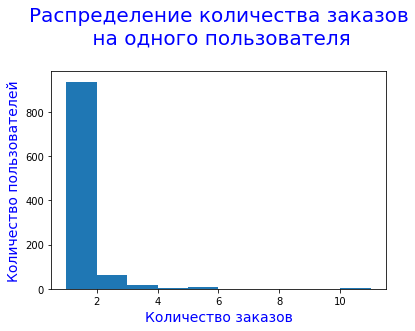

In [64]:
plt.hist(ordersByUsers['orders']) 


plt.ylabel('Количество пользователей', fontsize=14, color = "b")
plt.xlabel('Количество заказов', fontsize=14, color = "b")
plt.title('Распределение количества заказов\n на одного пользователя\n'
              , fontsize=20, color = "b")

plt.show()

Ранее в Исследовательском анализе мы уже отмечали, что 90% пользователей делают всего один заказ. Сейчас мы вновь видим это.   
Однако доля пользователей с 2-4 заказами тоже визуализируется.   
   
Построим точечную диаграмму числа заказов на одного пользователя:

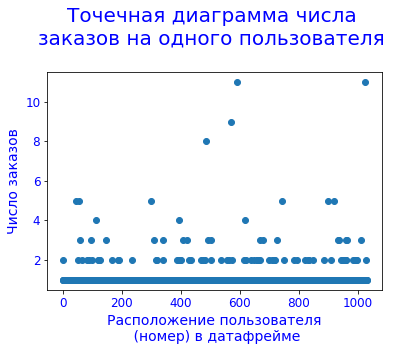

In [65]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Точечная диаграмма числа \nзаказов на одного пользователя \n', fontsize=20, color = "b")
#plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=0, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Расположение пользователя\n (номер) в датафрейме", fontsize=14, color = "b")
plt.ylabel("Число заказов", fontsize=14, color = "b")
plt.show()

**Вывод по разделу**   
Мы видим, что много пользователей с 1-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 


### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.



Определим 90, 95 и 99 перцентили количества заказов на одного пользователя:

In [66]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


10% пользователей заказывали более одного раза.
Не более 5% пользователей оформляли больше, чем 2 заказа. То есть 3 и более заказов оформляли единичные пользователи.  

**Вывод по разделу**   
Выберем 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеем аномальных пользователей по ней. 

### Построим точечный график стоимостей заказов. 

Ранее, в разделе Исследовательского анализа данных, мы уже отметили наличие значительного количества выбросов в стоимости заказов в обеих группах.   
Сейчас же мы выберем границу для определения аномальных заказов, для чего построим точечную диаграмму стоимости заказов:

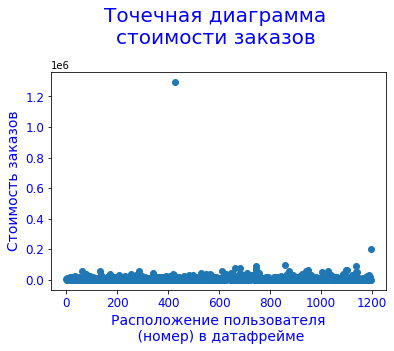

In [67]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
#plt.ylim(0, 200000)

plt.title('Точечная диаграмма \nстоимости заказов \n', fontsize=20, color = "b")
#plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=0, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Расположение пользователя\n (номер) в датафрейме", fontsize=14, color = "b")
plt.ylabel("Стоимость заказов", fontsize=14, color = "b")
plt.show()

Данные на построенной диаграмме "жмутся" к нижней оси - причина в наличии одного "сверхзаказа" - мы уже писали о нем ранее.   
**Вывод по разделу**  
По графику можно предполагать верхнюю границу обычных заказов не более 100 000 рублей.   
  

### Посчитаем 95-й и 99-й перцентили стоимости заказов.
Для принятия решения о размере оттсеиваемых аномальных значений определим 90, 95 и 99 перцентили стоимоти заказов.

In [68]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Итак, мы имеем не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей.   
Общеринято отсеивать от 1% до 5% наблюдений с крайними значениями.   
Чтобы правильно определить границу, еще раз построим точечную диаграмму стоимости заказов, но определим верхнюю границу по оси размера заказа, равную 100000

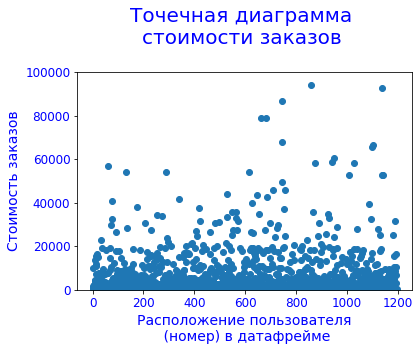

In [69]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)

plt.title('Точечная диаграмма \nстоимости заказов \n', fontsize=20, color = "b")
#plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=0, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Расположение пользователя\n (номер) в датафрейме", fontsize=14, color = "b")
plt.ylabel("Стоимость заказов", fontsize=14, color = "b")
plt.show()

Мы видим, что в диапазоне чека от 28000 до 60000 заказы хотя и не постоянно, но все-же встречаются не так, чтобы очень редко.  
**Вывод по разделу**   
По этой причине примем верхню границу аномальных значений, раную значения 99-го перцентиля - 58000.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.


Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.    
Сформулируем гипотезы. 
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.

Подготовим данные

In [70]:

# Создадим переменную visitorsADaily, в которую определим даты и количество посетителей сайта из группы А. 
# Переименуем названия столбцов
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Соберём агрегированные кумулятивные по дням посещения сайта.  В переменной visitorsACummulative
# будут отражены ежедневные результаты нарастающим итогом, с учетом результатов предыдущих дней.
# Переименуем названия столбцов
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Аналогично создадим переменную visitorsBDaily, в которую определим даты и количество посетителей сайта из группы B. 
# Также переименуем названия столбцов
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Соберём агрегированные кумулятивные по дням посещения сайта.  В переменной visitorsACummulative
# будут отражены ежедневные результаты нарастающим итогом, с учетом результатов предыдущих дней.
# Переименуем названия столбцов
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


# Создадим переменную ordersADaily, в которую определим даты и количество посетителей, совершивших заказы, из группы А. 
# Приравняем значению ordersADaily занчение ранее созданной переменной orders_A
# Напомним, как была создана переменная orders_A
# orders_A = orders.query('group == "A"').groupby(by = 'date').agg({'revenue': ['count', 'sum']})
# Переименуем названия столбцов

# ЗДЕСЬ ИЗМЕНИТЬ ПРИ НЕОБХОДИМОСТИ
ordersADaily = orders_A.reset_index()
#ordersADaily = (
#    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
#    .groupby('date', as_index=False)
#    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'}))

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Соберём агрегированные кумулятивные по дням посещения сайта.  В переменной visitorsACummulative
# будут отражены ежедневные результаты нарастающим итогом, с учетом результатов предыдущих дней.
# Переименуем названия столбцов
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# Также создадим переменную ordersBDaily, в которую определим даты и количество посетителей, совершивших заказы, из группы B. 
# Приравняем значению ordersBDaily занчение ранее созданной переменной orders_B
# Напомним, как была создана переменная orders_B
# orders_B = orders.query('group == "B"').groupby(by = 'date').agg({'revenue': ['count', 'sum']})
# Переименуем названия столбцов

# ЗДЕСЬ ИЗМЕНИТЬ ПРИ НЕОБХОДИМОСТИ
ordersBDaily = orders_B.reset_index()
#ordersBDaily = (
#    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
#    .groupby('date', as_index=False)
#    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'}))

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Также соберём агрегированные кумулятивные по дням посещения сайта.  В переменной visitorsBCummulative
# будут отражены ежедневные результаты нарастающим итогом, с учетом результатов предыдущих дней.
# Переименуем названия столбцов
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Обединим полученные восемь переменных в одну таблицу по столбцу date и назовем ее data. 
# В таблице будут отражены в разрезе дат и в разрезе групп количестов посещений сайта по дням и нарастающим итогом 
# и количество совершенных заказав по дням и нарастающим итогом
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Напомним названия столбцов данных:
-	**date** — дата;
-	**ordersPerDateA** — количество заказов в выбранную дату в группе A;
-	**revenuePerDateA** — суммарная выручка в выбранную дату в группе A;
-	**ordersPerDateB** — количество заказов в выбранную дату в группе B;
-	**revenuePerDateB** — суммарная выручка в выбранную дату в группе B;
-	**ordersCummulativeA** — суммарное число заказов нарастающим итогом до выбранной даты включительно в группе A;
-	**revenueCummulativeA** — суммарная выручка нарастающим итогом до выбранной даты включительно в группе A;
-	**ordersCummulativeB** — суммарное количество заказов нарастающим итогом до выбранной даты включительно в группе B;
-	**revenueCummulativeB** — суммарная выручка нарастающим итогом до выбранной даты включительно в группе B;
-	**visitorsPerDateA** — количество пользователей в выбранную дату в группе A;
-	**visitorsPerDateB** — количество пользователей в выбранную дату в группе B;
-	**visitorsCummulativeA** — количество пользователей нарастающим итогом до выбранной даты включительно в группе A;
-	**visitorsCummulativeB** — количество пользователей нарастающим итогом до выбранной даты включительно в группе B.


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [71]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.    Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.  
Переменная sampleA должна состоять из двух частей:
- Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].
- Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']).   
   
Создадим объект pd.Series нужной длины:

In [72]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

Объединим последовательности функцией pd.concat() и передадим ей списки из переменных ordersByUsersA (и для группы В -  ordersByUsersB) и созданый объект pd.Series:
Дальше передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд): pd.concat([...], axis=0). То же делаем для sampleB и получаем:

In [73]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Получим среднее число заказов на пользователя, найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean(). Применим критерий Манна-Уитни.     
Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.

In [74]:

print('p-value: ',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов: ',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value:  0.017
Относительный прирост среднего числа заказов:  0.138


**Вывод по разделу**   
По «сырым» данным мы видим наличие различий в среднем числе заказов групп A и B.  
Значение p-value = 0.017 меньше 0.05. Значит, мы должны отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет. И должны принять альтернативную гипотезу о наличии статистически значимых различий в среднем количестве заказов на посетителя.   
Относительный прирост группы B равен 13.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Теперь проверим статистическую значимость различий в среднем чеке между сегментами.   
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть.   

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.   
Также найдём относительные различия в среднем чеке между группами

In [75]:
print('p-value: ','{0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                       orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия в среднем чеке между группами','{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/
    orders[orders['group']=='A']['revenue'].mean()-1))

p-value:  0.729
Относительные различия в среднем чеке между группами 0.259


P-value значительно больше 0.05. 
  
**Вывод по разделу**   
Значит, по "сырым" данным причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.    
Впрочем отметим, что средний чек группы B значительно превосходит средний чек группы A. Но, поскольку нам не удалось выявить статистически значимых различий в среднем чеке, наблюдаемые относительные различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

###  Рассмотрим наличие статистически значимых различий в среднем количестве заказов на посетителя между группами при условии исключения аномальных значений количества покупок и размера одной покупки (по «очищенным» данным)

Чуть ранее мы условились, что:
- выберем 2 заказа на одного пользователя за верхнюю границу числа заказов, а тех, кто совершил 3 и более заказов - примем за аномальные значений и этим мы отсеем 5% пользователей.
- примем верхню границу аномальных значений, раную значения 99-го перцентиля - 58000, то есть заказы на большую сумму также отнесем к аномальным.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape.   

Для  убобства при необходимости повторного анализа откажемся от ручного ввода обозначаемых границ и заменим их на соответствующие коду обозначения (перцентили).   
Введем переменную value_for_orders для ввода границы по количеству заказов и переменную value_for_revenue для ввода границы по стоимости заказа.

In [76]:
value_for_orders = 95
value_for_revenue = 99

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [value_for_orders])[0]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [value_for_orders])[0]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [value_for_revenue])[0]]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
31


Всего 31 аномальный пользователель.   
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [77]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [78]:
print('p-value: ','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов: ','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value:  0.010
Относительный прирост среднего числа заказов:  0.174


Выше по «сырым» данным мы отметили наличие различий в среднем числе заказов групп A и B.
Значение p-value составило 0.017, что меньше 0.05 и что подтверждает наличие различий в среднем числе заказов групп A и B.
А относительный прирост группы B был равен 13.8%.

**Вывод по разделу**   
Результаты по среднему количеству заказов, рассчитанному по очищенным данным практически не изменились и составили, как мы видим:
- p-value:  0.010, что вновь меньше 0.05. 
- Относительный прирост среднего числа заказов:  17.4%

Посмотрим, как повлияют очищенные данные на результаты расчетов по среднему чеку?

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [79]:
print('p-value: ',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия в среднем чеке между группами',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value:  0.798
Относительные различия в среднем чеке между группами -0.020


Выше по «сырым» данным мы отметили, что нет оснований считать наличие различий в среднем чеке заказов групп A и B.
Значение p-value составило 0.729, что значительно больше 0.05.   
А относительный прирост группы B был равен 25.9%.

**Вывод по разделу**  
Результаты по среднему чеку заказов, рассчитанному по очищенным данным практически не изменились и составили, как мы видим:
- p-value:  0.798, что вновь меньше 0.05 и не дает нам оснований предполагать наличие различий
- Относительный прирост среднего числа заказов:  -2% - то есть при исключении аномальных значений заказов мы наблюдаем даже некоторое снижение среднего чека.


Таким образом, общие выводы по результатам теста с очищенными данными по сравнению с результатами стеста по "сырым" данным не изменились.

Итак:
- Мы видим наличие различий в среднем числе заказов групп A и B.
- Не имеем оснований отвергнуть предположение о разнице среднего чека.  
- В пункте 6.6  мы выявили значительное превышение кумулятивной выручки в группе В, рассчитанное по "сырым" данным.   
- В Пункте 6.8 мы увидели превышение среднего чека в группе В, рассчитанного по "сырым" данным и указали на возможное присутствие аномалий (которые в дальнейшем были подтверждены.
- В пункте 6.9 видим, что кумулятивное количество заказов в нруппе В превышвет аналогичный показатель в группе А

Средний чек и количество заказов, безусловно, важные показатели и их произведение дает нам выручку.  
Но коль скоро мы обладаем очищенными данными - давайте  посмотрим, как меняется кумулятивная выручка в период тестирования в разрезе групп по "очищенным" данным. Полагаю, что этот показатель даст нам полную ясность.   

### Рассчитаем данные и построим графики кумулятивной выручки по дням и группам A/B-тестирования по "очищенным" данным

Вспомним, что мы выявили список уникальных пользователей, которым свойствены аномальные значения количества покупок и чека покупки. Этот список сохранен нами в переменной abnormalUsers и содержит уникальные значения идентификационного номера 31 пользователя.

Создадим датафрейм orders_with_count_of_purchase_1, в который перенесем из базы orders записи о покупках только тех пользователей, которые НЕ присутствуют в переменной abnormalUsers

In [80]:
orders_with_count_of_purchase_1 = orders[~orders['visitorid'].isin(abnormalUsers)] 
orders_with_count_of_purchase_1

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


Убедимся, что количество уникальных пользователей изменилось (уменьшилось) как раз на 31 - столько пользователей в переменной abnormalUsers.

In [81]:
orders['visitorid'].nunique() - orders_with_count_of_purchase_1['visitorid'].nunique()

31

Подготовим данные для построения графиков

In [82]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_with_count_of_purchase_1[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders_with_count_of_purchase_1[np.logical_and(orders_with_count_of_purchase_1['date'] <= x['date'], orders_with_count_of_purchase_1['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}),
    axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      18      17   112340       719
1 2019-08-01     B      19      19    78258       713
2 2019-08-02     A      37      35   204472      1338
3 2019-08-02     B      42      41   240301      1294
4 2019-08-03     A      61      59   316945      1845


Построим графики кумулятивной выручки в разрезе групп

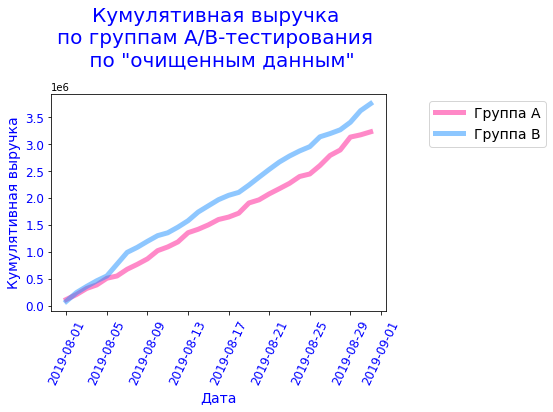

In [83]:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A',
         linewidth=5, alpha=0.5, color = "DeepPink" )

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B',
        linewidth=5, alpha=0.5, color = "DodgerBlue")


plt.title('Кумулятивная выручка \nпо группам A/B-тестирования \n по "очищенным данным"\n', fontsize=20, color = "b")
plt.legend(fontsize=14, bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=65, fontsize=12, color = "b")
plt.yticks(rotation=0, fontsize=12, color = "b")
plt.xlabel("Дата", fontsize=14, color = "b")
plt.ylabel("Кумулятивная выручка", fontsize=14, color = "b")
plt.show()

**Вывод по разделу**  
Мы помним, что на аналогичном графике, построенном по "сырым" данным, визуализируется резкий рост выручки в группе И на 18-й день теста и соприкосновение графиков группы А и группы В на 13й день теста.  
Как видим, по "очищенным" данным кумулятивная выручка в обеих группах растет равномерно и планомерно, без всплесков и соприкосновений.  
График убедительно показывает нам, что кумулятивная выручка в период теста в группе В постоянно превышает выручку в группе А.


### Примем решение по результатам теста. 
Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

Какие выводы по тесту можем сделать?

Имеющиеся факты:
- Имеется статистически значимое различие по среднему количеству заказов между группами, посчитанному как по «сырым» данным, так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B хуже группы A на всем протяжении теста и по-прежнему не достигает значений группы А. 
- График различия среднего чека говорит о том, что пикообразные единичные росты связаны с двумя аномальными покупками. Тенденция изменения среднего чека за исключением этих аномальных покупок говорит о его снижении относительно сренего чека по группе А.
- И при этом кумулятивная выручка в период теста в группе В постоянно превышает выручку в группе А.

Изложенное выше позволяет нам:
- сделать вывод о том, что продажи в группе В выглядят лучше 
- принять решение остановить тест ввиду наличия постоянного и ежедневного улучшения кумулятивной выручки в тестируемой группе по сравнению с контрольной группой.

Возможно, что на результаты теста повлияли следующие не совсем корректные  исходные данные :
- Количеством клиентов разных групп, посещающих сайт, различается более, чем на 10% в течение 6 дней из 31 дня сбора данных. Это существенная разница и она может повлиять на результаты теста. На будущее следует рекомендовать производить разделение клиентов между группами с разницей не более, чем 1%
- Всего в исследовании приняли участие 1031 уникальных клиентов и при этом в группе А присутствует 503 уникальных клиента, а в группе В - 586 уникальных клиентов (в сумме - 1089, что больше, чем 1031). Таким образом один и тот же клиент мог присутствовать как в группе А, так и в группе В, что является нежелательным и может повлиять на результаты теста
- Отсутствует возможность рассчитать время, проходящее между посещением клиентом сайта и совершением клиентом покупки и соотнести полученные данные с периодом исследования.


## Выводы
### На этапе ознакомления и предобработки предоставленных данных мы выявили:
•	В датафрейме hypothesis представлены 9 гипотез и предоставленные данные позволяют применить фреймворки ICE и RICE для приоритизации гипотез<br>
•	В датафреймах orders и visitors  предоставленных данных достаточно большое количество и они сравнительно равномерно распределены, чтобы провести статистический и сравнительный анализ. <br>
•	во всех трех датафреймах пропуски данных и дублирование данных отсутствует<br>

•	В процессе предобработки преобразованы названия столбцов: названия столбцов приведены к нижнему регистру и данные о датах и времени преобразованы в формат Datatime<br>
•             5,6% клиентов присутствуют как в группе А, так и в группе В. Мы должны помнить, что попавший в одну из групп посетитель должен оставаться в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно. По этой причине мы должны подвергнуть сомнению справедливость разделения клиентов на группы и, соответственно, результаты полученного теста. <br>
•	тем не менее ввиду того, что доля таких клиентов составляет 5,6%, клиенты не окажут сильного воздействия на результат. При этом, если таких клиентов исключить, то могут быть утеряны данные, которые вносят существенное различие в сравнение групп. Исходя из этого мы примем решение - не удалять клиентов, которые присутствуют в обеих группах.

### Исследовательский анализ датафреймов orders и visitors  показал следующее:
•	Распределение данных ненормальное и присутствует значительное количество выбросов.<br>
•	Почти 91% покупателей совершили всего одну покупку и еще 6% - совершили две покупки. Мы не знаем, какой ассортимент у рассматриваемого интернет-магазина. в случае, если это товары повседневного спроса, то можно предположить, что удержание покупателей находится на довольно низком уровне.<br>
•	Всего в исследовании приняли участие 1031 уникальных клиентов и при этом в группе А присутствует 503 уникальных клиента, а в группе В - 586 уникальных клиентов (в сумме - 1089, что больше, чем 1031). Таким образом один и тот же клиент мог присутствовать как в группе А, так и в группе В, что является нежелательным и может повлиять на результаты теста<br>
•	Количеством клиентов разных групп, посещающих сайт, различается более, чем на 10% в течение 6 дней из 31 дня сбора данных. Это существенная разница и она может повлиять на результаты теста. На будущее следует рекомендовать производить разделение клиентов между группами с разницей не более, чем 1%<br>
•	Отсутствует возможность рассчитать время, проходящее между посещением клиентом сайта и совершением клиентом покупки и соотнести полученные данные с периодом исследования. Это может повлиять на результаты проводимого теста<br>

### Приоритизация гипотез с применением фреймворка RICE
•	гипотеза 7 стала абсолютным лидером в приоритезации, оторвавшись от второй позиции по количеству  набранных баллов ровно в два раза. Звучит эта гипотеза так: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".


### Анализ A/B-теста. Проверка гипотез.

в ходе анализа A/B-теста мы выявили:
- минимальная необходимая длительность теста - 22 дня. В нашем случае тест длится 31 день, таким образом, выбрана достаточная длительность теста.
-  отсутствует возможность рассчитать время, проходящее между посещением клиентом сайта и совершением клиентом покупки и соотнести полученные данные с периодом исследования.
-  разница в пропорциях при указанных размерах выборок достаточна, чтобы говорить о статистически значимом различии предоставленных данных.
- Итоги расчёта критерия Шапиро-Уилка для клиентов обеих групп, совершивших покупки, не позволяет говорить о нормальности распределения сумм покупок. В данных присутствуют выбросы
- Кумулятивное количество заказов по группе В растет опережающими темпами и к концу периода тестирования превышает аналогичный показатель по группе А примерно на 10% - это довольно большое преимущество. Можно сказать, что действия покупателей в группе В более предсказуемы и последовательны, хотя среднее количество заказов на покупателя в группе А больше во всем периоде тестирования.
- Практически все время теста конверсия в группе B значительно (до 20% разницы) превышала конверсию в группе A, несколько понизившись во второй половине рассматриваемого периода и возобновив рост в последние пять дней теста
- более 2-х заказов на одного пользователя и значение чека более 58000 являются аномальными значениями и отсеяны нами для дальнейшего исследования
- среднее количество заказов на покупателя в группе А больше во всем периоде тестирования, чем среднее количество заказов на покупателя в группе В.
- По «сырым» мы приняли альтернативную гипотезу о наличии статистически значимых различий в среднем количестве заказов на посетителя 
- по "сырым" данным нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия.
- Результаты по среднему количеству заказов, рассчитанному по очищенным данным практически не изменились по сравнению с результатами , составленными по «сырым» данным, то есть:  приняли альтернативную гипотезу о наличии статистически значимых различий в среднем количестве заказов на посетителя  
- Результаты по среднему чеку заказов, рассчитанному по очищенным данным, также  практически не изменились и  мы не видим причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия.




### В результате исследования сформированы выводы:
- продажи в группе В выглядят лучше 
- следует принять решение остановить тест ввиду наличия постоянного и ежедневного улучшения кумулятивной выручки в тестируемой группе по сравнению с контрольной группой.
- Возможно, что на такие результаты теста повлияли следующие не совсем корректные исходные данные :
 - Количество клиентов разных групп, посещающих сайт, различается более, чем на 10% в течение 6 дней из 31 дня сбора данных. Это существенная разница 
 - Один и тот же клиент мог присутствовать как в группе А, так и в группе В, что является нежелательным и может повлиять на результаты теста
 - Отсутствует возможность рассчитать время, проходящее между посещением клиентом сайта и совершением клиентом покупки и соотнести полученные данные с периодом исследования.


### Рекомендации для отдела маркетинга. При проведении последующих тестов для получения корректных результатов учесть рекомендации:

-  иметь возможность рассчитать время, проходящее между посещением клиентом сайта и совершением клиентом покупки и соотнести полученные данные с периодом исследования.
-  производить разделение клиентов между группами с разницей не более, чем 1%
-  не допускать, чтобы один и тот же клиент мог присутствовать как в группе А, так и в группе В

Также следует обратить внимание и подвергуть дополнительному анализу то, что среднее количество заказов на покупателя в группе А больше во всем периоде тестирования, чем среднее количество заказов на покупателя в группе В (пункт 6.10) - интренет магазин мог бы еще увеличить конверсию в группе В.



